In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
mba = msrp_band_analyzer.MSRPBand()

In [3]:
mba.update_company_data(['EMA'])


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C10-0000774-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-08

Verifying download summaries for license C10-0000695-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-02-09

Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2022-01-25
Latest download summary: 2022-02-09

[SUCCESS] All download summaries look good!
[FAILURE] Fxound a total of 42 unknown transfer packages
97.0% of incoming transfer packages have receiver wholesale price
# transactions missing incoming transfer package: 0 (0.0%)
# transactions total: 105363
# receipts with mismatching transactions: 0 (0.0%)
# receipts missing transactions: 0 (0.0%)
# receipts total: 46664
### Adding new columns calculated by average price per unit ### 	
### Sorting time serie

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Available combined product category name in costs dataframe ### 	
['edible' 'vape cartridge' 'pre-roll flower' 'pre-roll infused' 'tincture'
 'topical' 'other concentrate' 'extract' 'flower' 'capsule'
 'pre-roll leaf' 'shake' 'seeds' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['pre-roll flower' 'vape cartridge' 'edible' 'extract' 'capsule' 'topical'
 'tincture' 'flower' 'pre-roll infused' 'pre-roll leaf'
 'other concentrate' 'shake' 'infused butter/oil' 'seeds']


In [4]:
top10_product_category_list = [
    'Other Concentrate (weight - each)',
    'Flower (packaged half ounce - each)',
    'Pre-Roll Infused',
    'Pre-Roll Flower',
    'Extract (weight - each)',
    'Flower',
    'Edible (weight - each)',
    'Vape Cartridge (weight - each)',
    'Vape Cartridge (volume - each)',
    'Flower (packaged eighth - each)'
]

# SALES Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 10.048622366288493 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.519796249131743 %
Total number of transactions for Flower (packaged eighth - each) in tx_product_category_name : 18233


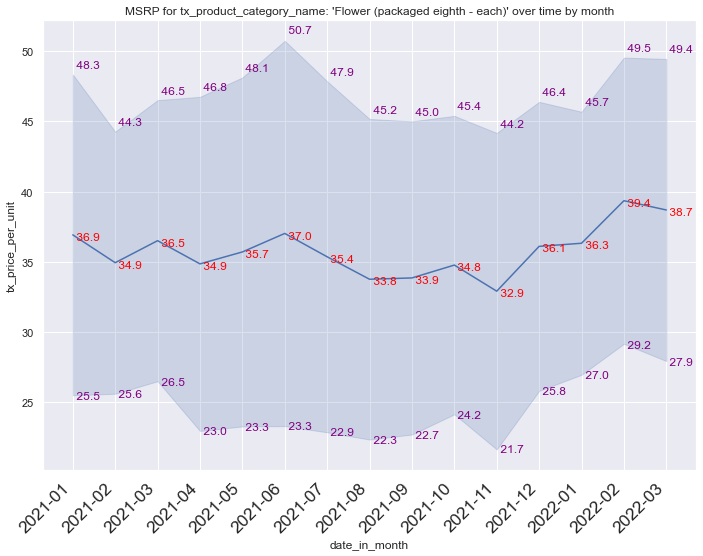

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 3.376906318082789 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.7843137254901961 %
Total number of transactions for Vape Cartridge (volume - each) in tx_product_category_name : 4399


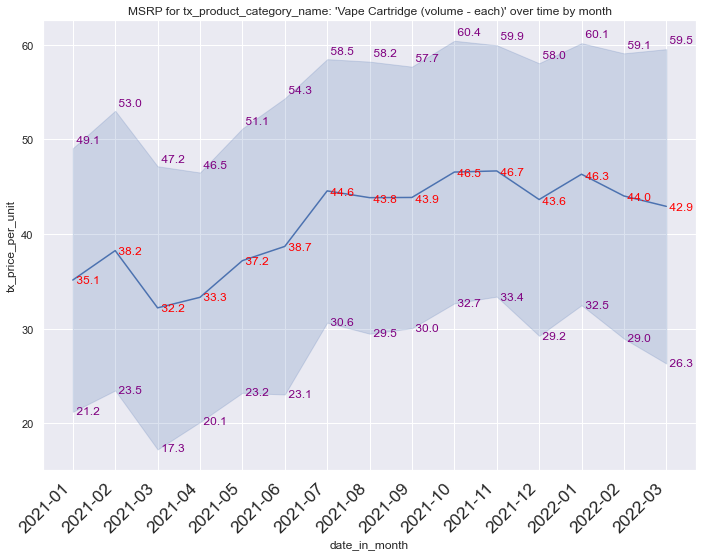

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 7.75615340583858 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.9622209502003436 %
Total number of transactions for Vape Cartridge (weight - each) in tx_product_category_name : 6239


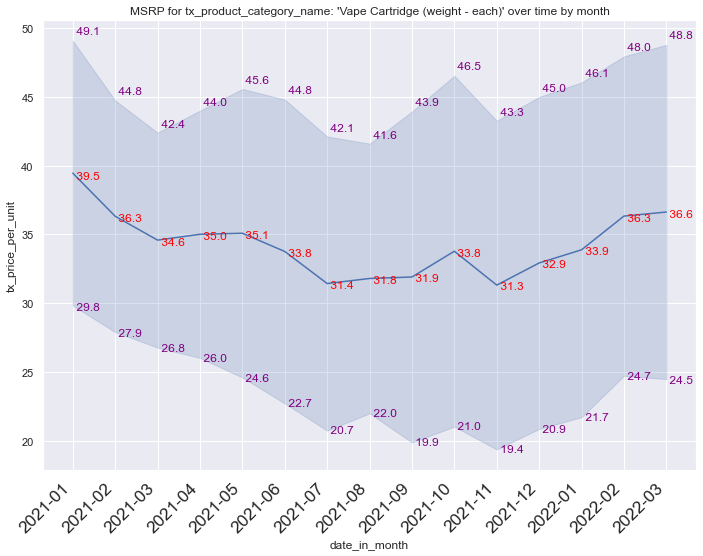

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 14.504215174628662 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.4616619831393015 %
Total number of transactions for Edible (weight - each) in tx_product_category_name : 21182


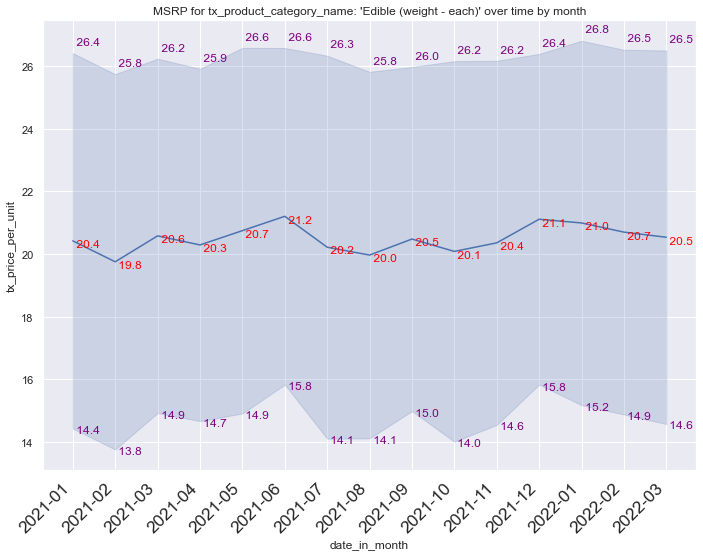

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
### There are 0 rows with category name of Flower ###
### SKIPPING PRODUCT CATEGORY Flower ###
### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 11.412062116287467 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.351029252437703 %
Total number of transactions for Extract (weight - each) in tx_product_category_name : 2111


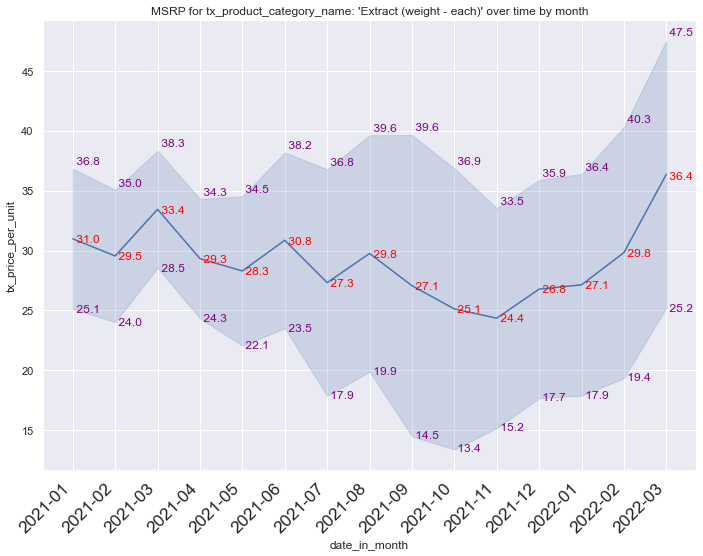

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 12.263582700879413 %
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 14566


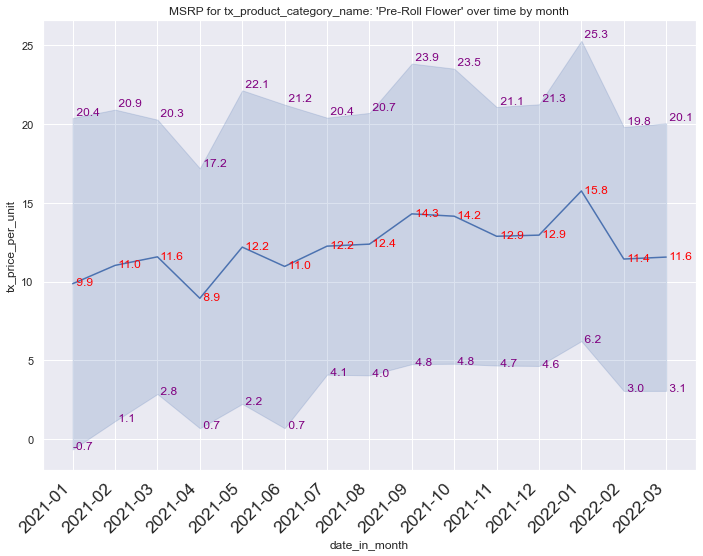

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 15.12854655331353 %
Total number of transactions for Pre-Roll Infused in tx_product_category_name : 8286


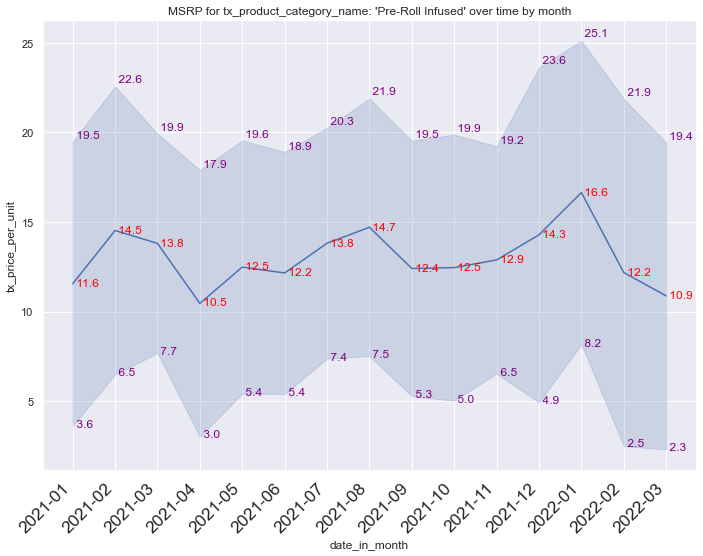

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 13.549618320610687 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.534351145038168 %
Total number of transactions for Flower (packaged half ounce - each) in tx_product_category_name : 424


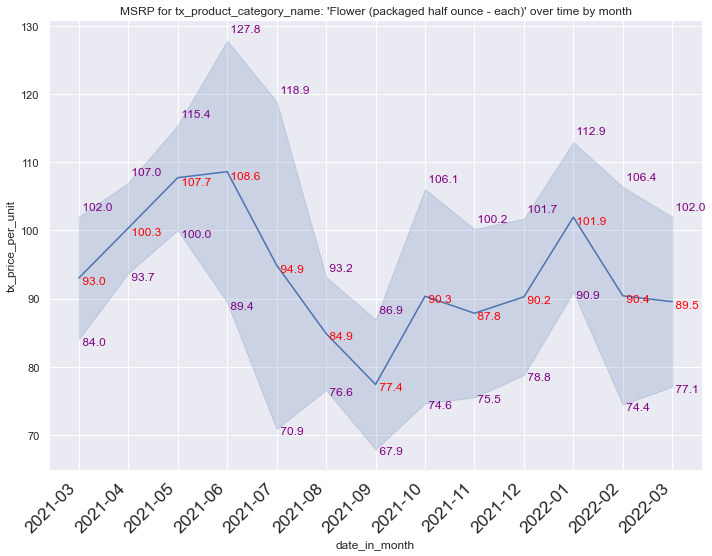

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 11.541565778853915 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.16545601291364 %
Total number of transactions for Other Concentrate (weight - each) in tx_product_category_name : 1032


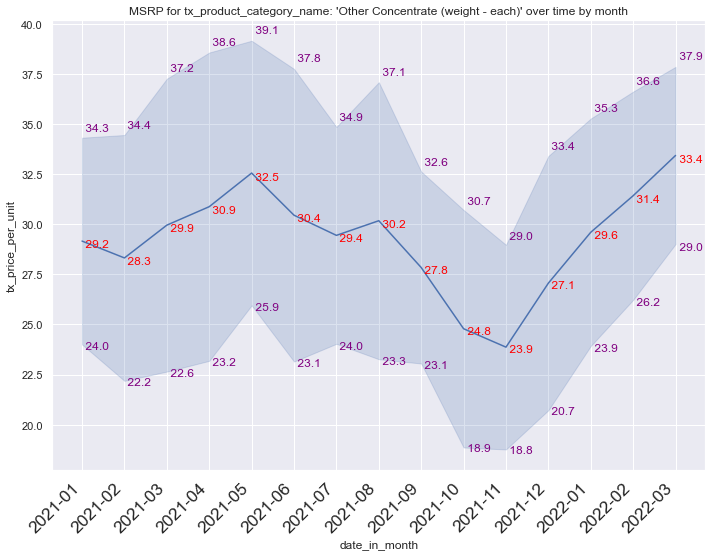

In [5]:
mba.run_time_series_plot_analysis_multi_category('tx_product_category_name', top10_product_category_list[::-1], 'S')

# COSTS Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Flower (packaged eighth - each) in product_category_name : 1001


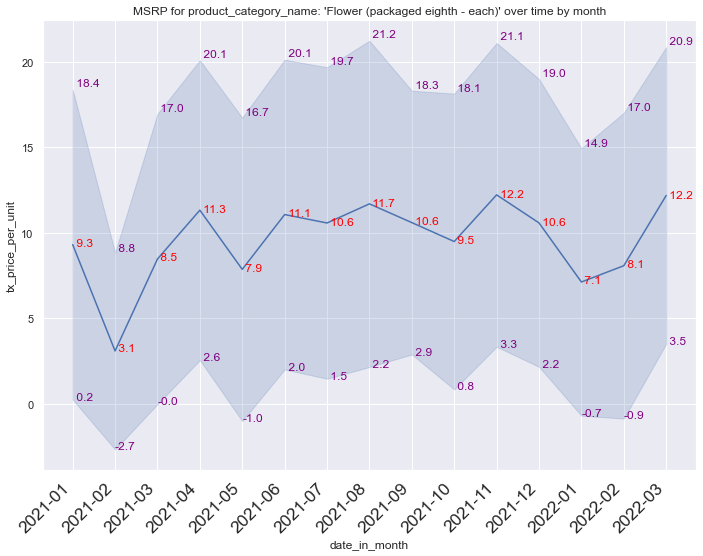

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Vape Cartridge (volume - each) in product_category_name : 457


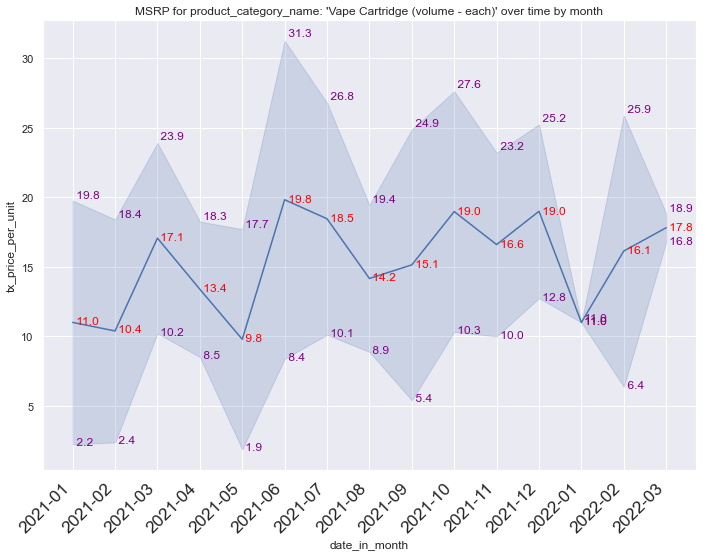

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Vape Cartridge (weight - each) in product_category_name : 564


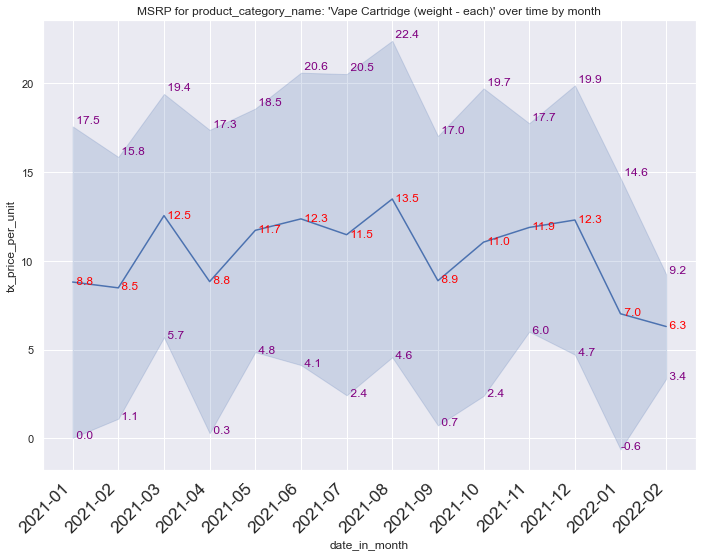

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.9212730318257957 %
Total number of transactions for Edible (weight - each) in product_category_name : 1183


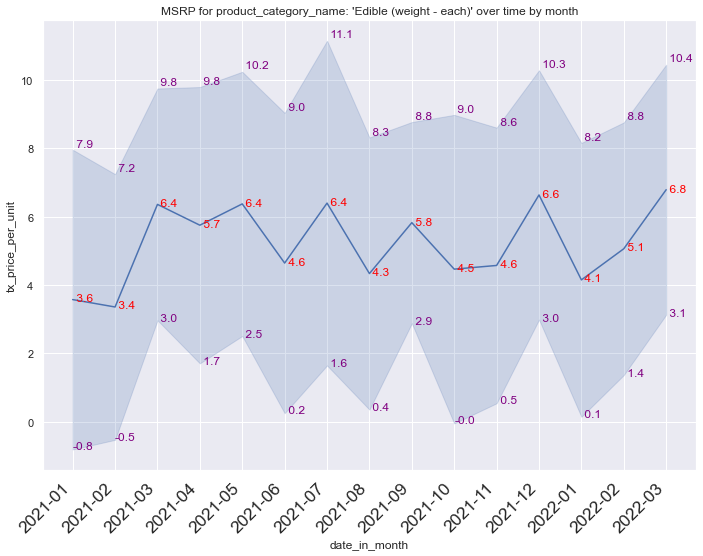

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
### There are 0 rows with category name of Flower ###
### SKIPPING PRODUCT CATEGORY Flower ###
### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.93371757925072 %
Total number of transactions for Extract (weight - each) in product_category_name : 316


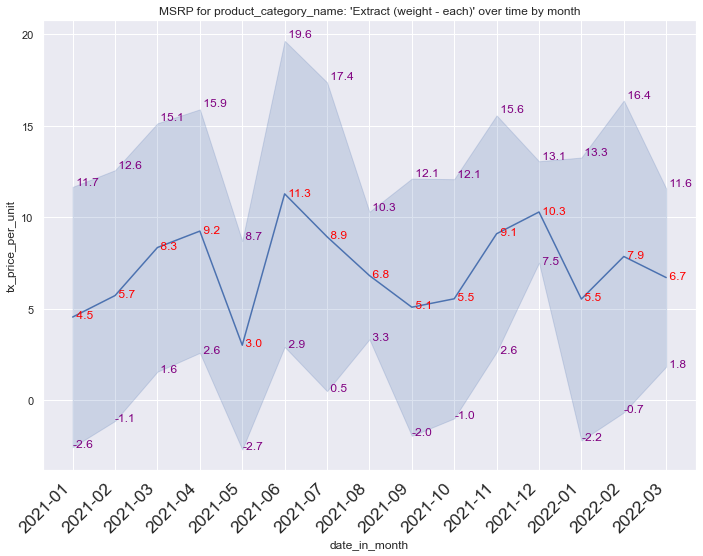

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.751592356687898 %
Total number of transactions for Pre-Roll Flower in product_category_name : 732


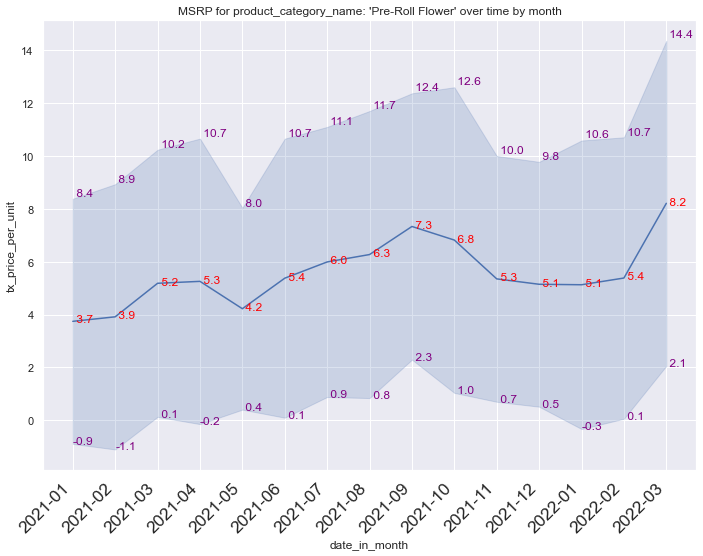

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.1926782273603083 %
Total number of transactions for Pre-Roll Infused in product_category_name : 518


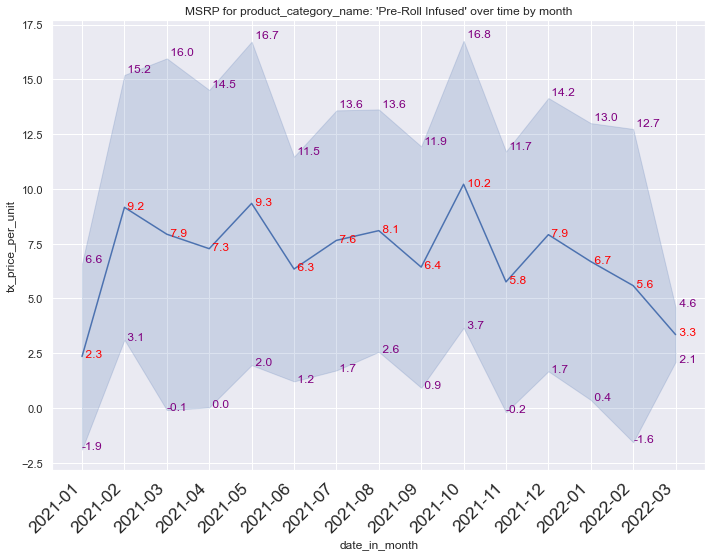

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.0 %
Total number of transactions for Flower (packaged half ounce - each) in product_category_name : 60


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


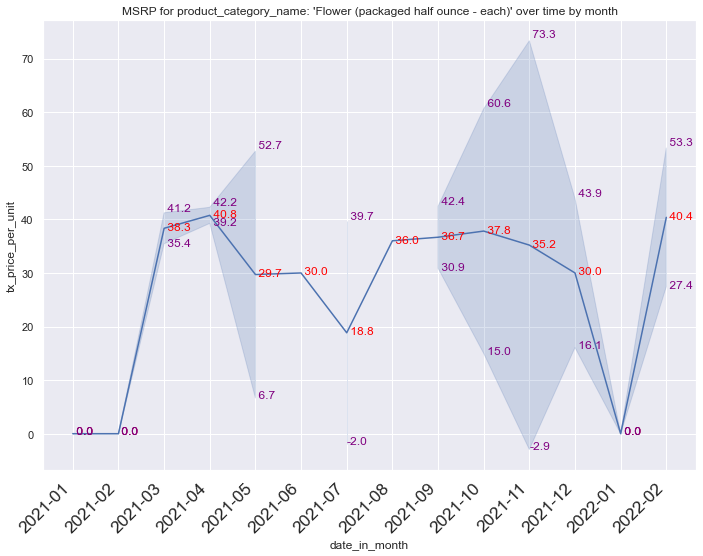

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.4246575342465753 %
Total number of transactions for Other Concentrate (weight - each) in product_category_name : 141


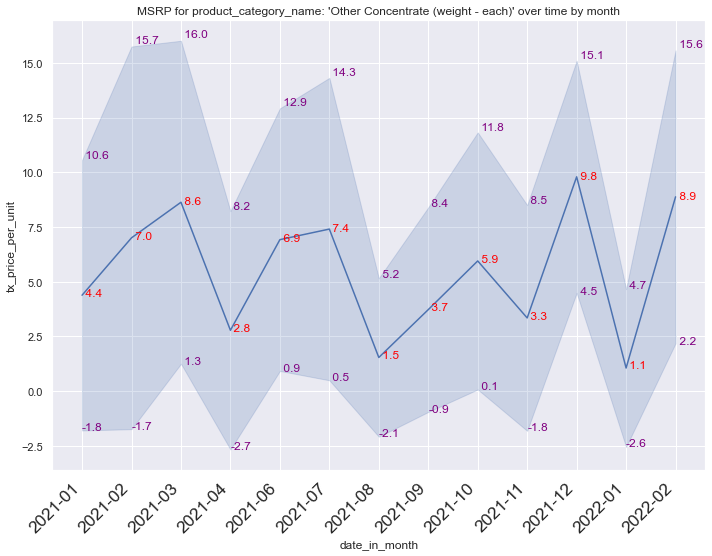

In [6]:
mba.run_time_series_plot_analysis_multi_category('product_category_name', top10_product_category_list[::-1], 'C')